In [1]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_float, img_as_ubyte, io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = img_as_float(io.imread("python/ct.jpg"))

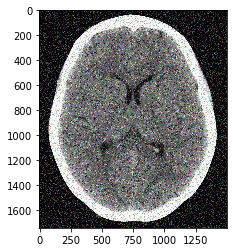

In [3]:
plt.imshow(img)

In [4]:
sigma_est = np.mean(estimate_sigma(img, multichannel=True))

In [5]:
nlm = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False, 
                           patch_size=5, patch_distance=3, multichannel=True)

In [6]:
denoise_ubtye = img_as_ubyte(nlm)

/Users/poomwarawat/opt/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


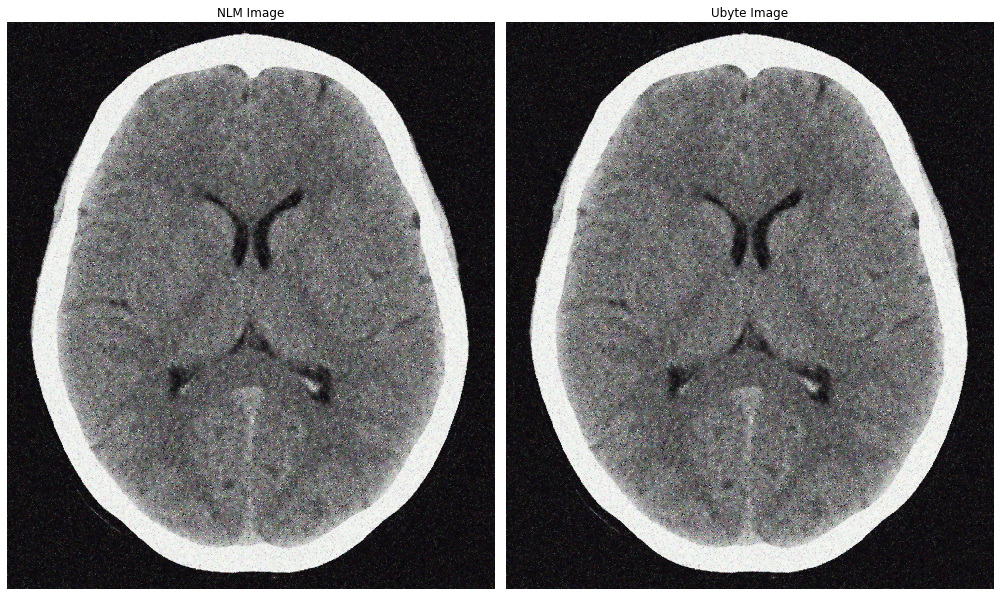

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(14, 14))

ax = axes.ravel()

ax[0].imshow(nlm)
ax[0].set_title("NLM Image")

ax[1].imshow(denoise_ubtye)
ax[1].set_title("Ubyte Image")

for x in ax:
    x.axis("off")
    
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Histogram Denoise')

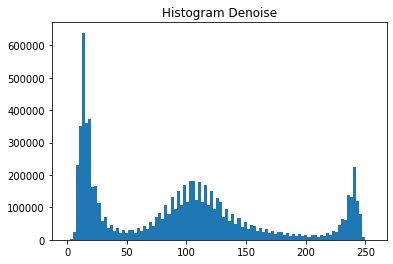

In [8]:
plt.hist(denoise_ubtye.flat, bins=100, range=(0,255))
plt.title("Histogram Denoise")

In [9]:
segm1 = (denoise_ubtye <= 55)
segm2 = (denoise_ubtye > 55) & (denoise_ubtye <= 110)
segm3 = (denoise_ubtye > 110) & (denoise_ubtye <= 210)
segm4 = (denoise_ubtye > 210)

In [10]:
all_seg = np.zeros((denoise_ubtye.shape[0], denoise_ubtye.shape[1]), dtype=np.uint8)

In [12]:
all_seg[segm1]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [13]:
all_seg[segm2]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [14]:
all_seg[segm3]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [15]:
all_seg[segm4]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [44]:
denoise_ubtye.shape

(1742, 1500, 3)